In [1]:
import pandas as pd
import numpy as np

from scipy import stats

# Daily Return Data
$$
\\
$$

In [2]:
r_d = pd.read_csv('r_ES50_d_cleaned_realized_Nov2020.csv', parse_dates=["Date"], index_col=0) #Date information is stored in column "Date". # index_col=0 sets "Date" as the index. This is required to use rich functionality of DATE_TIME

# Squared Daily Returns as a Backward-looking Variance Estimator
$$
\\
$$

In [4]:
Var_r_mth1 = r_d**2

## Visualized Market Variance i.e. Squared Market Returns

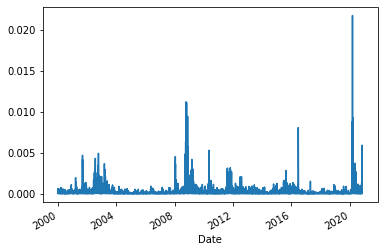

In [5]:
Var_r_mth1["1/N"].plot()

## Observations and Implications for Squared Daily MARKET Returns
$$
\\
$$

1. Covid-19 shock with twice the vol as 2008 financial crisis
$$
\\
$$

2. Vol clusters. low vol periods followed by short high vol episodes
$$
\\
$$

3. Changes in vol are abrupt and not diffusive.
$$
\\
$$

$$
\\
$$

**Learning Points for Modeling**
$$
\\
$$

1. ==> vol_t is time-varying
$$
\\
$$

2. ==> vol_t contains diffusive and jump components.  

## Visualize Realized Daily Return Variance of VOW.DE

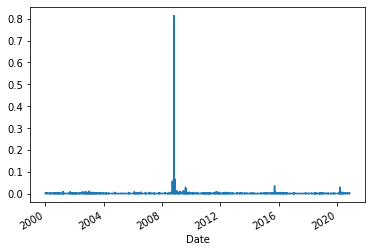

In [6]:
Var_r_mth1["VOW.DE"].plot()

## Is Daily Return Variance Gaussian Distributed?

$$
\\
$$

- **for sure, NOT** 
$$
\\
$$

**Obs: skew**

- strongly right skewed, i.e. 17

==> **LP for modeling:** **upward jumps** in vol necessary
$$
\\
$$

**Obs: kurtosis**

- huge kurtosis: i.e. 600

==> **LP for modeling:** **vol in vol** necessary 

In [7]:
[stats.skew(Var_r_mth1).mean(), stats.kurtosis(Var_r_mth1).mean()]  #rough view (across firms)

[17.604911990471958, 598.908118358228]

In [8]:
#requires: pip install ipynb --upgrade
from ipynb.fs.defs.Helper_plotPDF import print_pdf

ADS.DE
Non-Gaussian Density


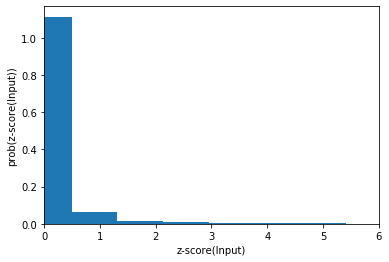

AI.PA
Non-Gaussian Density


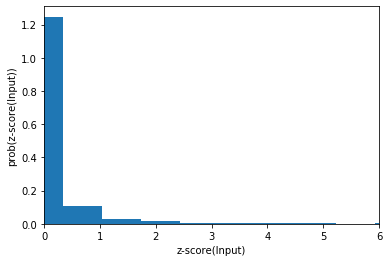

ALV.DE
Non-Gaussian Density


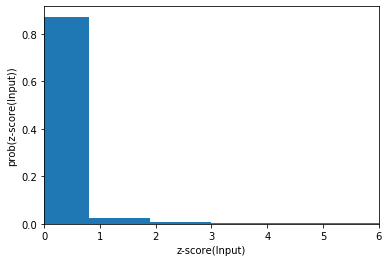

ASML.AS
Non-Gaussian Density


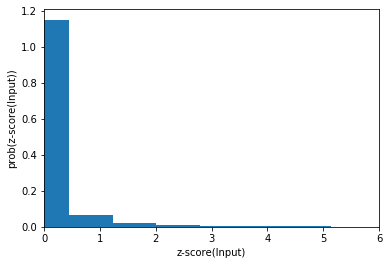

CS.PA
Non-Gaussian Density


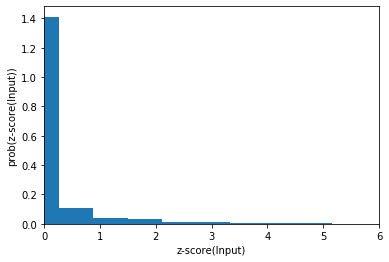

BBVA.MC
Non-Gaussian Density


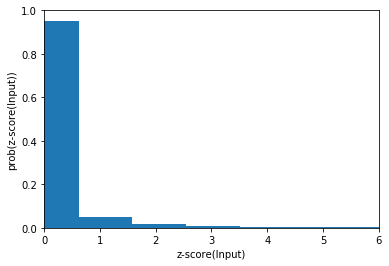

SAN.MC
Non-Gaussian Density


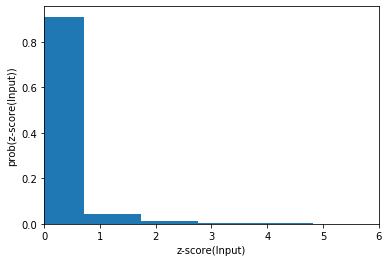

BAS.DE
Non-Gaussian Density


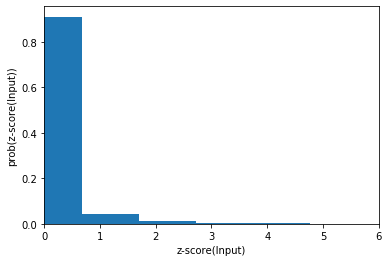

BAYN.DE
Non-Gaussian Density


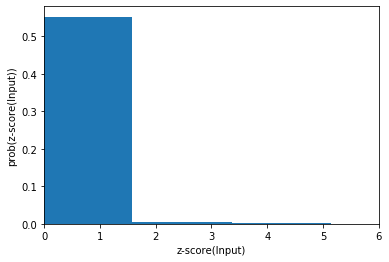

BMW.DE
Non-Gaussian Density


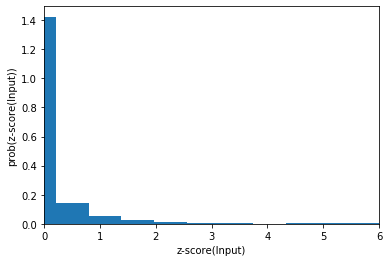

BNP.PA
Non-Gaussian Density


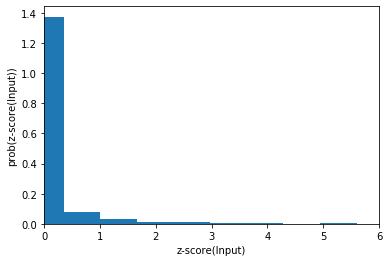

CRG.IR
Non-Gaussian Density


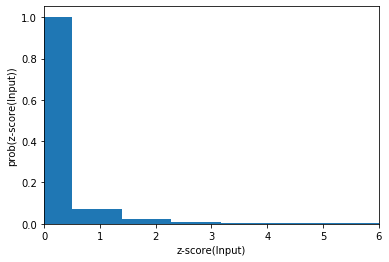

SGO.PA
Non-Gaussian Density


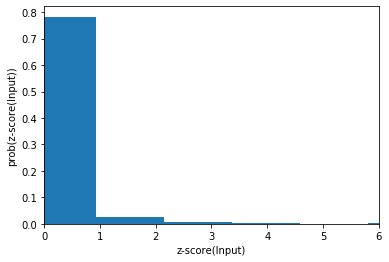

DAI.DE
Non-Gaussian Density


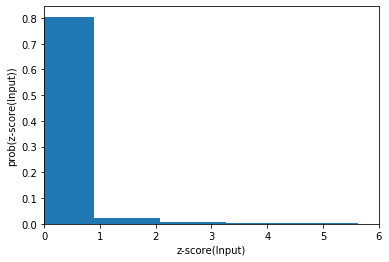

DTE.DE
Non-Gaussian Density


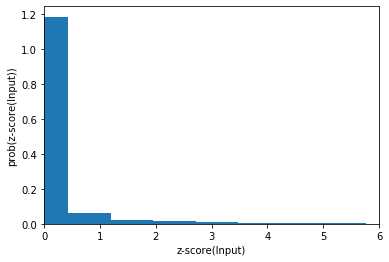

ENEL.MI
Non-Gaussian Density


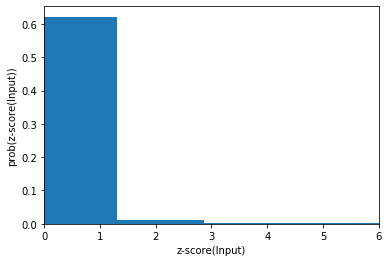

ENGI.PA
Non-Gaussian Density


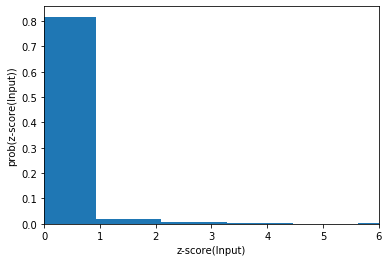

ENI.MI
Non-Gaussian Density


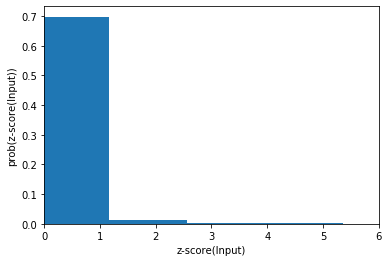

EOAN.DE
Non-Gaussian Density


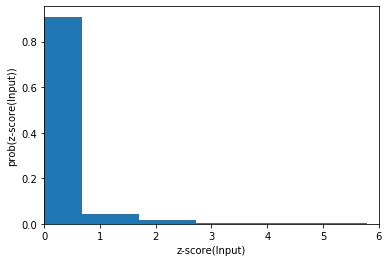

FRE.DE
Non-Gaussian Density


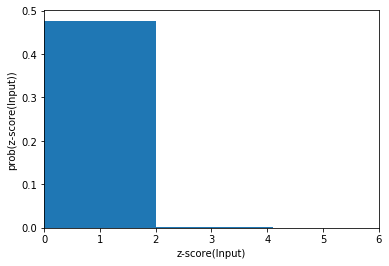

BN.PA
Non-Gaussian Density


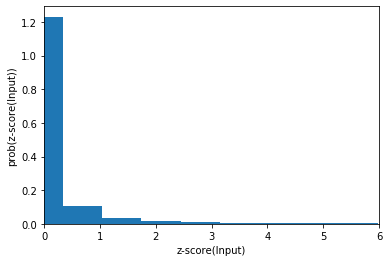

IBE.MC
Non-Gaussian Density


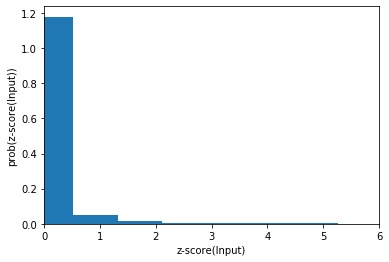

INGA.AS
Non-Gaussian Density


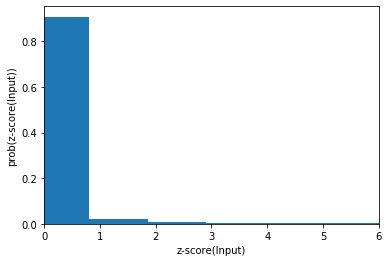

ISP.MI
Non-Gaussian Density


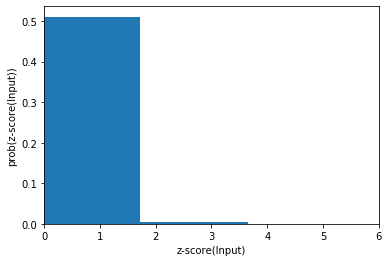

OR.PA
Non-Gaussian Density


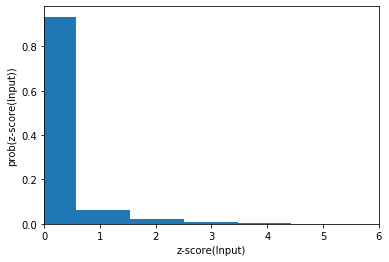

MC.PA
Non-Gaussian Density


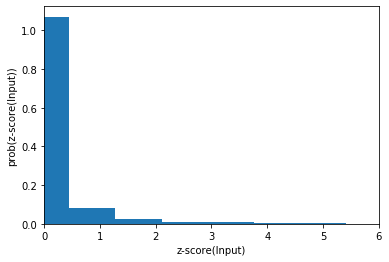

MUV2.DE
Non-Gaussian Density


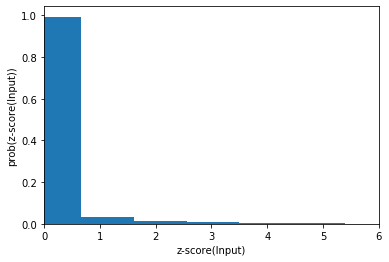

NOKIA.HE
Non-Gaussian Density


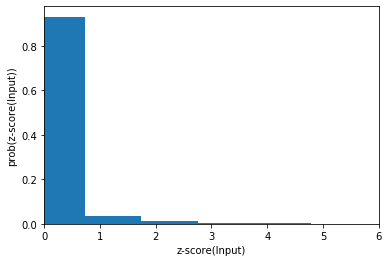

ORA.PA
Non-Gaussian Density


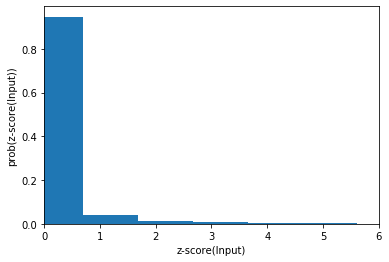

PHIA.AS
Non-Gaussian Density


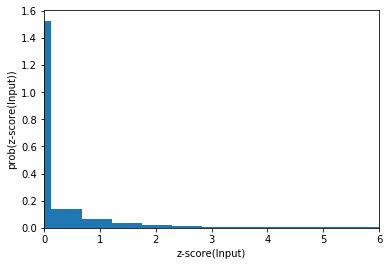

SAF.PA
Non-Gaussian Density


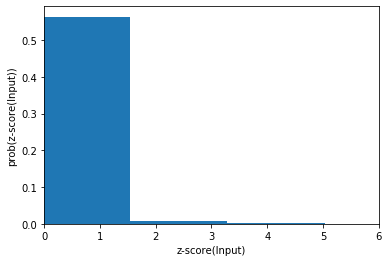

SAN.PA
Non-Gaussian Density


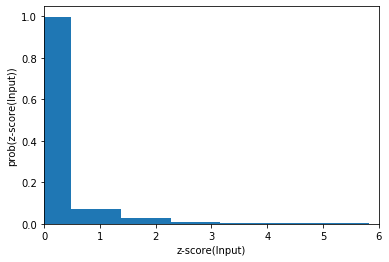

SAP.DE
Non-Gaussian Density


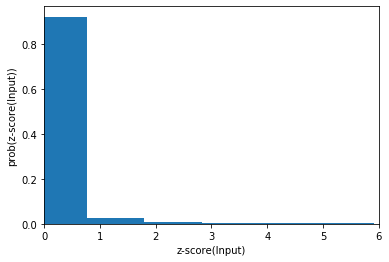

SU.PA
Non-Gaussian Density


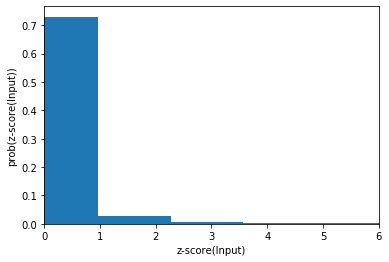

SIE.DE
Non-Gaussian Density


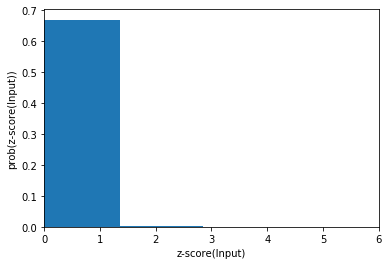

TEF.MC
Non-Gaussian Density


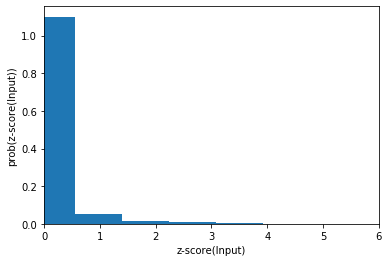

FP.PA
Non-Gaussian Density


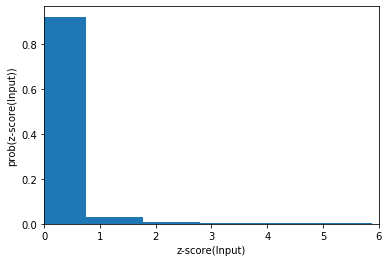

URW.AS
Non-Gaussian Density


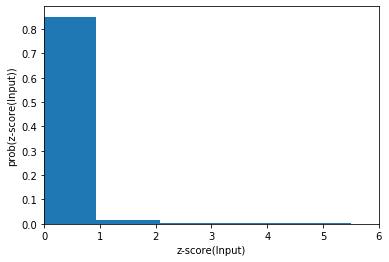

UNA.AS
Non-Gaussian Density


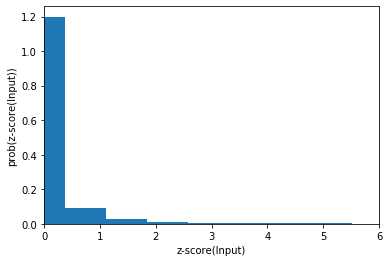

DG.PA
Non-Gaussian Density


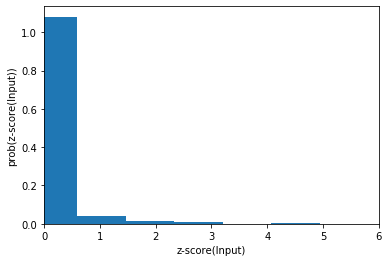

VIV.PA
Non-Gaussian Density


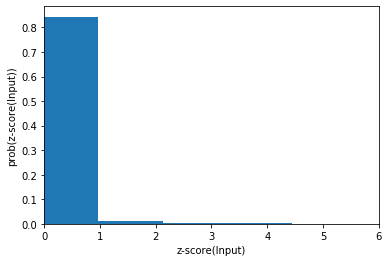

VOW.DE
Non-Gaussian Density


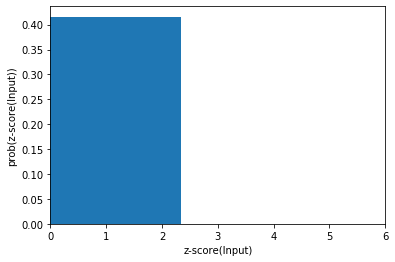

1/N
Non-Gaussian Density


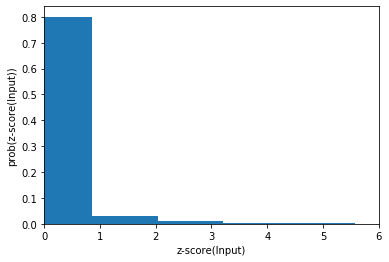

In [9]:
#Is (Var(r)) \sim N(.)
print_pdf(Var_r_mth1, 30, 1) #prints L(z(Var(r)))

## Variance Forecast for next periods
$$
\\
$$

1. **$r^2$ measure for realized variance does not allow to answer the question!**
$$
\\
$$

2. How to produce forecasts for variance?
$$
\\
$$

3. One could fit r^2 to a time-series model (parametric, non-parametric, linear, non-linear)
$$
\\
$$

4. r^2 is a noisy measure of variance. Resulting forecast is prone to measurement errors
$$
\\
$$

5. One could find a smoother (and hopefully more accurate) measure of variance
$$
\\
$$

6. One could extract priced-in variance from option contracts. These are variances that demand and supply have used to clear the option market. Yet, these variance measures have little measurement error but do potentially contain a time-variying bias due to variance risk premiums. 
$$
\\
$$

# GARCH Variance as a Backward-Looking Variance Estimator

In [10]:
from arch import arch_model 

In [11]:
basic_gm = arch_model(r_d["1/N"], p=1, q=1, mean='constant', vol = 'GARCH', dist = 'normal')

In [12]:
gm_result = basic_gm.fit(update_freq=4)

Iteration:      4,   Func. Count:     51,   Neg. LLF: -16418.80730795915
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -16418.95858947984
            Iterations: 9
            Function evaluations: 65
            Gradient evaluations: 5


/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001956. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


**Re-do with better scaling of y**

In [13]:
basic_gm = arch_model(100*r_d["1/N"], p=1, q=1, mean='constant', vol = 'GARCH', dist = 'normal')

In [14]:
gm_result = basic_gm.fit(update_freq=4)

Iteration:      4,   Func. Count:     33,   Neg. LLF: 8366.675474712029
Iteration:      8,   Func. Count:     61,   Neg. LLF: 8358.295869749036
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8358.039440664004
            Iterations: 11
            Function evaluations: 80
            Gradient evaluations: 11


In [16]:
0.066*252

16.632

In [15]:
print(gm_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    1/N   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -8358.04
Distribution:                  Normal   AIC:                           16724.1
Method:            Maximum Likelihood   BIC:                           16750.4
                                        No. Observations:                 5383
Date:                Mon, Nov 30 2020   Df Residuals:                     5379
Time:                        09:12:43   Df Model:                            4
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0660  1.365e-02      4.840  1.300e-06 [3.

In [18]:
gm_result.conditional_volatility #in % and per day

Date
2000-01-05    1.357347
2000-01-06    1.520007
2000-01-07    1.443518
2000-01-10    1.573600
2000-01-11    1.522819
                ...   
2020-11-06    1.701743
2020-11-09    1.633473
2020-11-10    2.951075
2020-11-11    2.897802
2020-11-12    2.723463
Name: cond_vol, Length: 5383, dtype: float64

In [21]:
r_d["1/N"].tail(5) #note: large return on 11-09 results in the 80% relative increaes in vol on 11-10

Date
2020-11-06   -0.008647
2020-11-09    0.076863
2020-11-10    0.026101
2020-11-11    0.001298
2020-11-12   -0.011318
Name: 1/N, dtype: float64

**Market Perspective: correlation of GARCH Vol with squared return measure**

In [23]:
np.corrcoef(Var_r_mth1["1/N"], gm_result.conditional_volatility**2) 

array([[1.        , 0.37598236],
       [0.37598236, 1.        ]])

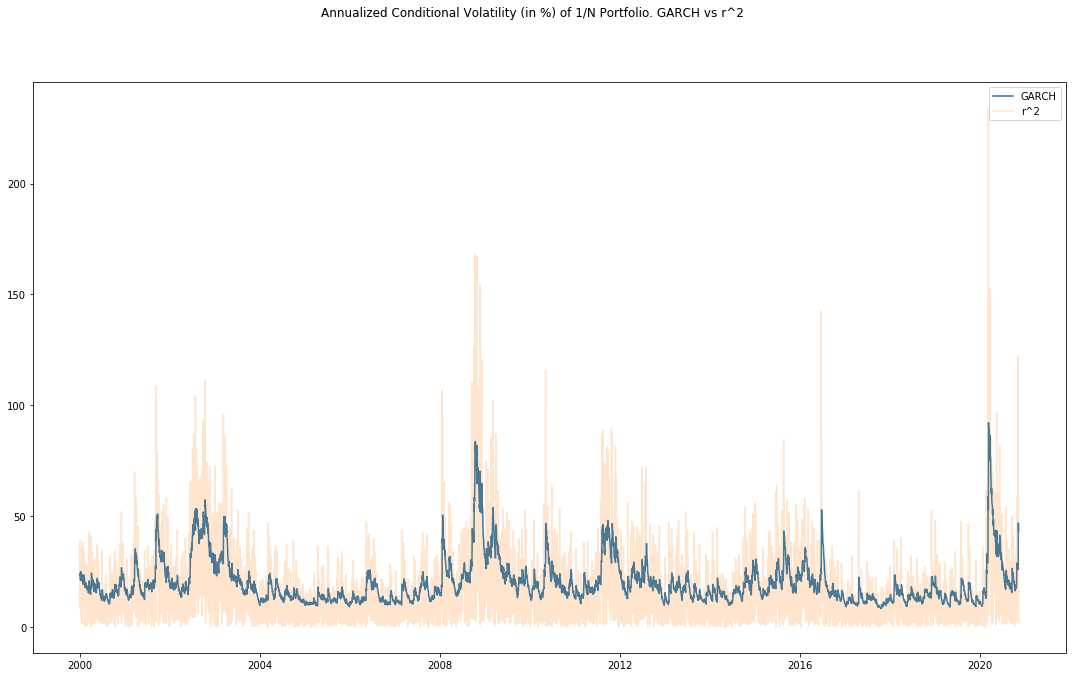

In [24]:
import matplotlib.pylab as plt

fig,ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Annualized Conditional Volatility (in %) of 1/N Portfolio. GARCH vs r^2')
ax1.plot(gm_result.conditional_volatility.index, gm_result.conditional_volatility*np.sqrt(252), label ='GARCH' )
ax1.plot(Var_r_mth1.index, np.sqrt(Var_r_mth1["1/N"] *252)*100, alpha=0.2, label = 'r^2')

leg = ax1.legend();

**Single Asset Perspective: correlation of GARCH Vol with squared return measure (i.e. VOW.DE)**

In [25]:
basic_gm_VOW = arch_model(100*r_d["VOW.DE"], p=1, q=1, mean='constant', vol = 'GARCH', dist = 'normal')

In [26]:
gm_result_VOW = basic_gm_VOW.fit(update_freq=4)

Iteration:      4,   Func. Count:     31,   Neg. LLF: 11207.288632449157
Iteration:      8,   Func. Count:     59,   Neg. LLF: 11199.785151097247
Iteration:     12,   Func. Count:     83,   Neg. LLF: 11199.549491301294
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 11199.549490333819
            Iterations: 12
            Function evaluations: 84
            Gradient evaluations: 12


In [29]:
print(gm_result_VOW.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 VOW.DE   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -11199.5
Distribution:                  Normal   AIC:                           22407.1
Method:            Maximum Likelihood   BIC:                           22433.5
                                        No. Observations:                 5383
Date:                Mon, Nov 30 2020   Df Residuals:                     5379
Time:                        09:47:33   Df Model:                            4
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0828  2.300e-02      3.597  3.215e-04 [3.767e-0

In [27]:
np.corrcoef(r_d["VOW.DE"]**2, gm_result_VOW.conditional_volatility**2) 

array([[1.        , 0.07451782],
       [0.07451782, 1.        ]])

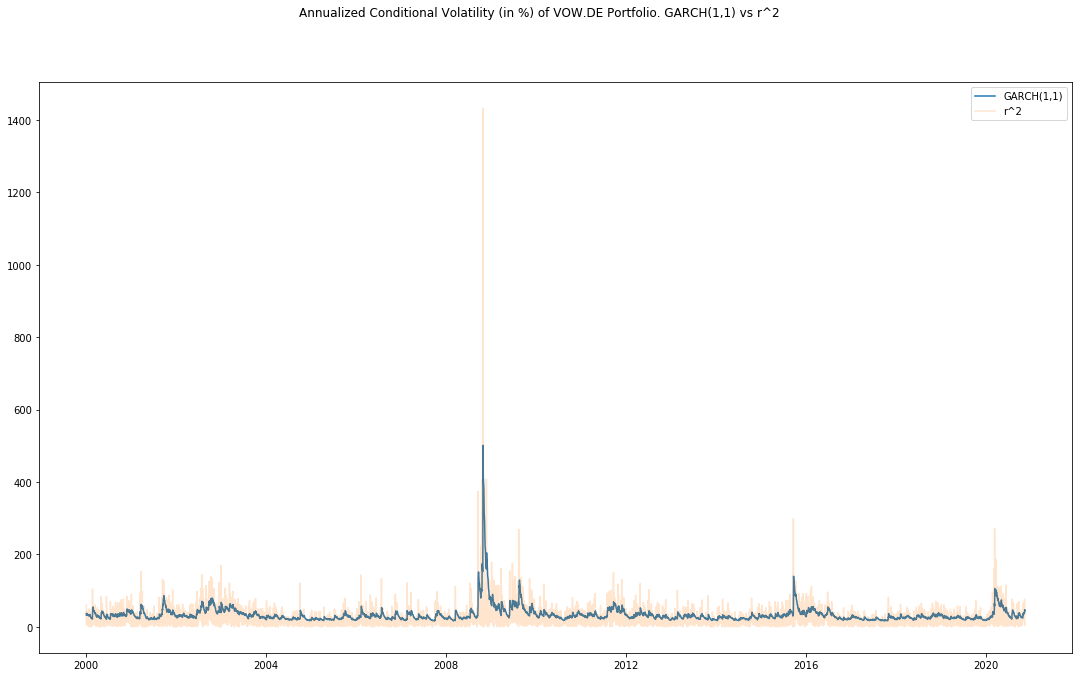

In [28]:
fig,ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Annualized Conditional Volatility (in %) of VOW.DE Portfolio. GARCH(1,1) vs r^2')
ax1.plot(gm_result.conditional_volatility.index, gm_result_VOW.conditional_volatility*np.sqrt(252), label ='GARCH(1,1)' )
ax1.plot(r_d.index, np.sqrt(r_d["VOW.DE"]**2 *252)*100, alpha=0.2, label = 'r^2')

leg = ax1.legend();

## Observations and Implications for GARCH Market and VOW Variance
$$
\\
$$

- GARCH vs Squared-Return variance for VOW.DE is 'completely' different
$$
\\
$$

- Difference is because realized returns are the product of vol and shock. The Squared-Return method ignores that and assigns periods of low vol with high shocks to coincide with high vol periods.
$$
\\
$$

- The Short-squeeze of VOW is still a 600% vol event in the GARCH estimate. 

$$
\\
$$

**Implications:** I would not use squared-returns as a variance measure if I need robust estimates.
$$
\\
$$

**Implications:** It is hard to say which measure is right as there is no 'true' observed variance measure in data. 

## GARCH-Variance Forecast for next periods
 
 

In [30]:
np.sqrt(252) * gm_result.conditional_volatility.tail()

Date
2020-11-06    27.014339
2020-11-09    25.930586
2020-11-10    46.846859
2020-11-11    46.001175
2020-11-12    43.233641
Name: cond_vol, dtype: float64

In order to get a forecast for 2020-11_13, one takes the estimted parameters and the last conditional vol and return innovation estimate from 2020-10-12. i.e. Iterate last conditional vol one period forward, using the estimated omega, alpha and beta.

GARCH implied vol time-series is a deteriministic function of past return shocks. Empirical research shows that option-implied vol is driven by shocks that do not drive returns. Said differently, vol (as observed in options) seems to be driven by their own innovations. Yet, GARCH type models do not account for that.

Also, Carnero et al (2004) finds that in GARCH models, the persistence parameter affects mean-reversion and kurtosis of the underlying time-series. In stochastic volatility models both of these features can be modelled independently. For more on that, see http://webdoc.sub.gwdg.de/ebook/serien/e/CORE/dp2006_42.pdf

Questions like 'How do returns change next period if vol goes up by x-units?' cannot be answered by GARCH models. For this, one has to allow vol to be driven by its own shocks

# SVM as a Backward-looking Variance Estimator
$$
\\
$$

In [32]:
#requires: pip install ipynb --upgrade
from ipynb.fs.defs.Helper_SVM_Harvey import QLSV

**FIT SVM to Demeaned Market Returns**

In [33]:
SVM        = QLSV(r_d["1/N"] - r_d["1/N"].mean())

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [34]:
SVM_result = SVM.fit(cov_type='robust')

In [35]:
print(SVM_result.summary())

                           Statespace Model Results                           
Dep. Variable:                    1/N   No. Observations:                 5383
Model:                           QLSV   Log Likelihood              -12253.655
Date:                Mon, 30 Nov 2020   AIC                          24513.310
Time:                        11:04:25   BIC                          24533.083
Sample:                             0   HQIC                         24520.214
                               - 5383                                         
Covariance Type:               robust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
phi            0.9844      0.004    280.713      0.000       0.978       0.991
sigma2_eta     0.0307      0.007      4.678      0.000       0.018       0.044
mu            -9.1340      0.159    -57.627      0.0

In [36]:
#conditonal vol of SVM implied return model
SVM_condVol_eqw = np.exp(SVM_result.smoothed_state[0] / 2)

**Plot SVM vs GARCH induced MKT Vol, Annualized in %**

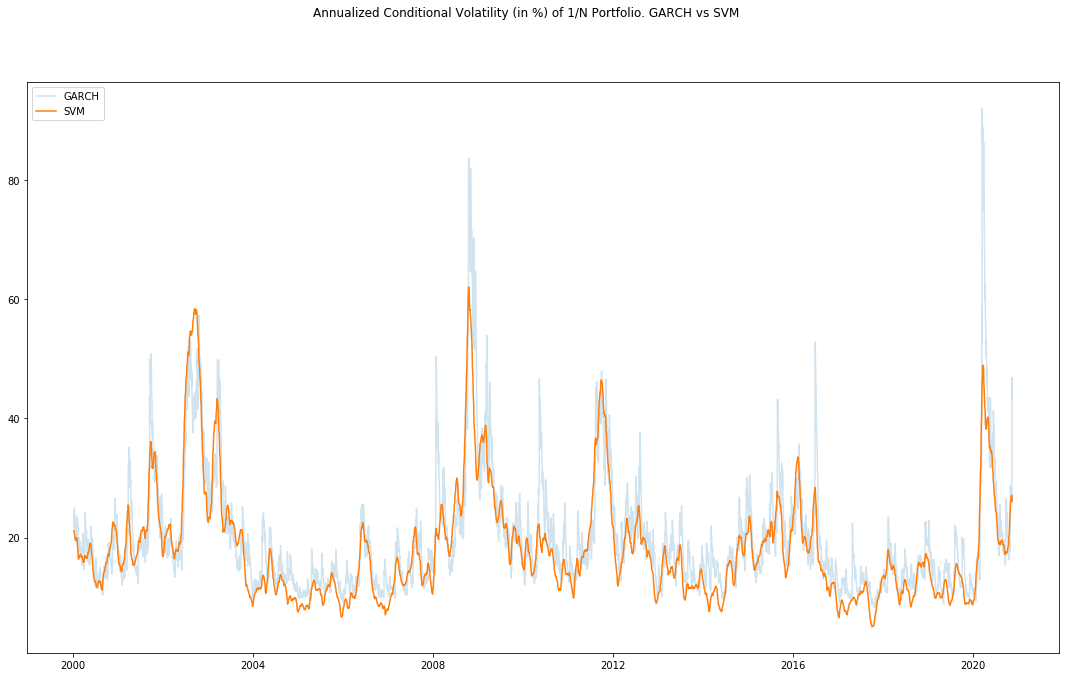

In [37]:
fig,ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Annualized Conditional Volatility (in %) of 1/N Portfolio. GARCH vs SVM')
ax1.plot(r_d.index, gm_result.conditional_volatility*np.sqrt(252), alpha=0.2, label ='GARCH' )
ax1.plot(r_d.index, SVM_condVol_eqw*100 * np.sqrt(252), label='SVM')

leg = ax1.legend();

In [38]:
np.corrcoef(gm_result.conditional_volatility, SVM_condVol_eqw) 

array([[1.        , 0.87804287],
       [0.87804287, 1.        ]])

**Plot SVM vs GARCH induced VOW.DE Vol, Annualized in %**

In [39]:
# Fit the model to VOW.DE "demeand" returns
SVM_vow        = QLSV(r_d["VOW.DE"] - r_d["VOW.DE"].mean())

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [40]:
SVM_vow_result = SVM_vow.fit(cov_type='robust')

In [41]:
SVM_condVol_VoW = np.exp(SVM_vow_result.smoothed_state[0] / 2)

In [42]:
np.corrcoef(gm_result_VOW.conditional_volatility, SVM_condVol_VoW)

array([[1.        , 0.59315351],
       [0.59315351, 1.        ]])

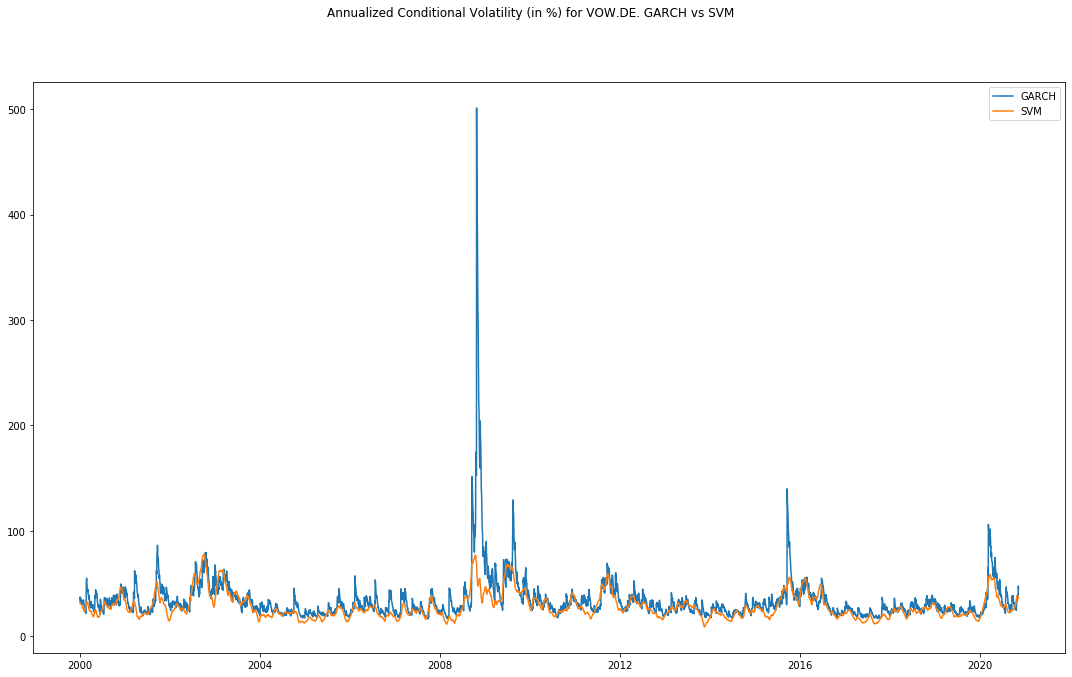

In [43]:
fig,ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Annualized Conditional Volatility (in %) for VOW.DE. GARCH vs SVM ')
ax1.plot(r_d.index, gm_result_VOW.conditional_volatility*np.sqrt(252), label ='GARCH' )
ax1.plot(r_d.index, SVM_condVol_VoW * np.sqrt(252)*100, label = 'SVM')

leg = ax1.legend();

### Observations and Implications GARCH vs SVM
$$
\\
$$

**MODEL UNCERTAINTY is clearly visible**
$$
\\
$$

- each Vol time-series is correct if the underlying model is correct and if ignoring estimation error. 

$$
\\
$$

**There are stark differences in times, even for MKT**
$$
\\
$$

- covid-19 vol: 80+% for GARCH and 40+% for SVM
$$
\\
$$

- US financial crisis vol: 80%+ for GARCH and 60+% for SVM

$$
\\
$$

**In times, gigantic differences for individual stocks (here e.g. VOW.DE)**
$$
\\
$$

- GARCH: Short-squeeze is interpreted as 500% vol event
$$
\\
$$

- SVM: Short-squeeze is interpreted as approx 80% vol event
 


$$
\\
$$

**Reason:** GARCH assumes that part of return shock coincides with vol. Hence, huge return innovations translate automatically into sizeable variance shocks. Note, this is model-implied. It is not clear whether this holds in the data. 

$$
\\
$$

**GARCH Vol is nearly always larger than SVM vol.**

### Prof's View on GARCH/SVM Vol for VOW.DE  
$$
\\
$$

- Short Squezze was a in my view return shock and not a vol shock
$$
\\
$$

- This picture suggests to me that SVM is preferred to GARCH. In short: I see only disadvantages to connect ex-ante variance to current price shocks. Noise in price shocks translates into noise in variance estimates.
    
$$
\\
$$

- Highlights problem: with what do we compare model estimates? Variance is unobserved and remains unobserved.

## SVM Variance Forecast for next periods
$$
\\
$$

1. **SVM provides a convenient way to forecast forward**
$$
\\
$$ 

**Using notation from Helper_SVM_Harvey ipynb**:
$$
\\
$$

\begin{align*}
Var(y_t|F_{t-1})  &= E[y^2_t |F_{t-1}]
\\
&=E[e^{h_t / 2} |F_{t-1}] \\
&= e^{\mu + \phi (h_{t-1} - \mu) + \frac{1}{2} \sigma^2_{\eta}}
\end{align*}

## Is Daily SVM Variance Gaussian Distributed?
$$
\\
$$

- **for sure, NOT** 
$$
\\
$$

**Obs: skew**

-  right skewed, i.e. 4 ( avg skew is 4/5th of GARCH skew)

==> **LP for modeling:** **upward jumps** in vol necessary
$$
\\
$$

**Obs: kurtosis**

- huge kurtosis: i.e. 26 (half the kurtosis of a GARCH implied estimate)

==> **LP for modeling:** **vol in vol** necessary 

# Some Comments from Literature

### Hansen, Lunde and Nason (2003): Choosing the Best Volatility Models: The Model Confidence Set Approach
$$
\\
$$

"The literature on volatility models of asset returns has proposed a large number of speciﬁcations, starting with the ARCH model of Engle (1982) and the GARCH model of Bollerslev (1986). This gives practitioners a wide rangeof models to choose from and naturally leads to the question: Which is the bestvolatility model? It is difﬁcult to answer this question because asset returns often do not contain sufﬁcient information to identify a single volatility model as ‘best’", p.840
$$
\\
$$


### Tesarova (2012): Value at Risk: GARCH vs. Stochastic Volatility Models: Empirical Study, Master Thesis at University of Prague
$$
\\
$$

**Abstract:** "The thesis compares GARCH volatility models and Stochastic Volatility (SV) models with Student’s t distributed errors and its empirical forecasting perfor- mance of Value at Risk on five stock price indices: S&P, NASDAQ Composite, CAC, DAX and FTSE. It introduces in details the problem of SV models Max- imum Likelihood examinations and suggests the newly developed approach of Efficient Importance Sampling (EIS). EIS is a procedure that provides an accurate Monte Carlo evaluation of likelihood function which depends upon high-dimensional numerical integrals.
Comparison analysis is divided into in-sample and out-of-sample forecasting performance and evaluated using standard statistical probability backtestig methods as conditional and unconditional coverage.
Based on empirical analysis thesis shows that SV models can perform at least as good as GARCH models if not superior in forecasting volatility and parametric VaR. "
$$
\\
$$


### Lehar et al. (2002): GARCH vs stochasic volatility: Option pricing and risk management
$$
\\
$$

**Conclusion:** "In this paper the performance of three option pricing models is evaluated. We compare the benchmark Black–Scholes model to valuation methods using GARCH and SV. The three processes are calibrated to intraday market prices of FTSE 100 contracts. The performance is evaluated by means of pricing errors and by the fit for VaR applications. Our first conclusion concerns the behavior of the pricing errors. We document that GARCH dominates SV and the benchmark Black–Scholes model. It achieves significant overall improvements in pricing performance. The pricing differences between SV and constant volatility are smaller. We thus observe that the choice of the volatility model is crucial for the pricing performance. However, these differences in performance are not apparent in the context of risk management. To examine the competing methodologies in this context we use the VaR framework. MC simulation with full valuation provides the forecasts of the expected profit/loss over a given horizon. As our second main conclusion, we find no measurable difference between the VaR forecasts of the three models. In particular, we document that all three approaches exhibit a **weak fit to the realized profits and losses**. Overall we therefore conclude that the **performance of a model strongly depends on the loss function** applied. Despite the reasonable fit to observed prices, the **GARCH model fails to forecast the tails of the distribution of option returns** with satisfying accuracy. We discuss this divergence of results and **we conclude that the assumption of conditional normality of the underlying is problematic for VaR predictions**."